## HCW and Tracer mass on shelf - Barkley (Non-dim)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
# Grid, state and tracers datasets of base case
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/gridGlob.nc'
grid = xr.open_dataset(grid_file)

state_file = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/stateGlob.nc' 
state = xr.open_dataset(state_file)

ptracers_file = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/ptracersGlob.nc'
ptracers = xr.open_dataset(ptracers_file)

ptracers_fileNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/ptracersGlob.nc'
ptracersNoC = xr.open_dataset(ptracers_fileNoC)


In [4]:
fileLWR = ('/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/HCW_TrMass_BARKLEY_run01.csv')
fileLWRNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/HCW_TrMass_BARKLEY_run02.csv') 

dfLWR = pd.read_csv(fileLWR)
dfLWRnoc = pd.read_csv(fileLWRNoC)
                

In [13]:

HCW_list = ['HCW01','HCW03','HCW04','HCW05','HCW06','HCW07','HCW08']
Mass_list = ['TrMassHCW01','TrMassHCW03','TrMassHCW04',
             'TrMassHCW05','TrMassHCW06','TrMassHCW07','TrMassHCW08']
TotMass_list = ['TotTrMass01','TotTrMass03','TotTrMass04',
             'TotTrMass05','TotTrMass06','TotTrMass07', 'TotTrMass08']

labels = ['Tr1','Tr3','Tr4','Tr5','Tr6','Tr7','Tr8']

colours = ['purple','blue','green','gold','orange','red','orchid']

                

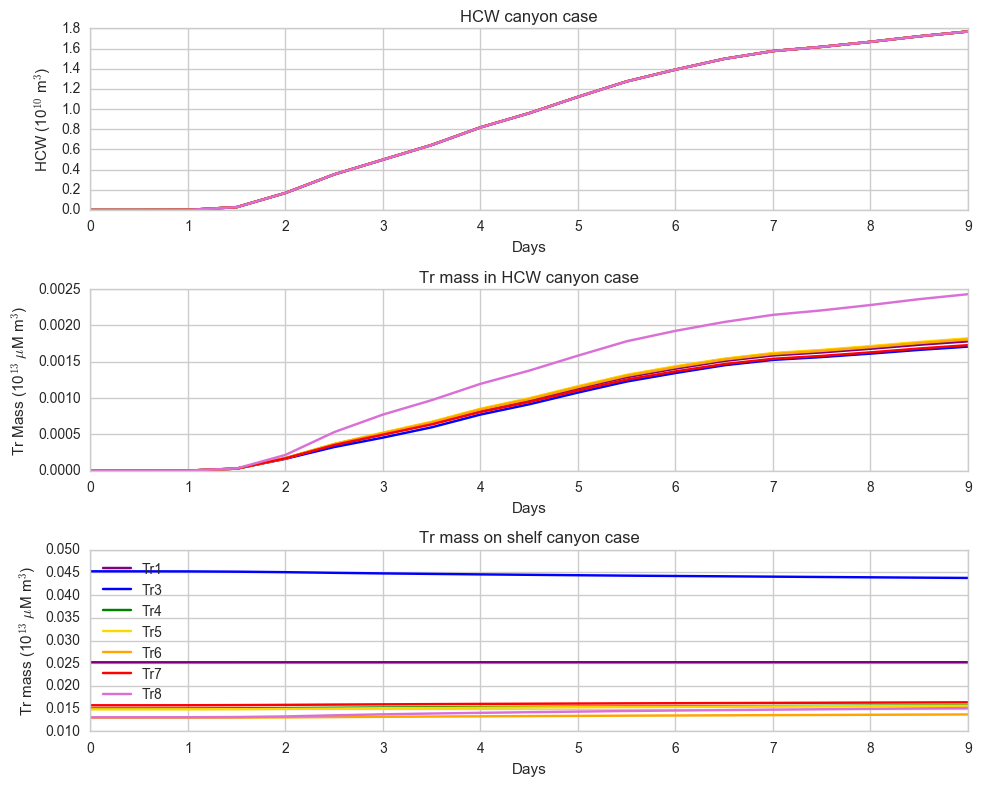

In [14]:
fig,ax = plt.subplots(3,1,figsize=(10,8))

for HCW, TrMass, TotTrMass,lab, col in zip(HCW_list,Mass_list,TotMass_list,labels,colours):
    
     ax[0].plot(np.arange(0,19,1)/2.0,(dfLWR[HCW])/1E10,color=col,label=lab)
     ax[1].plot(np.arange(0,19,1)/2.0,(dfLWR[TrMass])/1E13,color=col,label=lab)
     ax[2].plot(np.arange(0,19,1)/2.0,(dfLWR[TotTrMass])/1E13,color=col,label=lab)


ax[0].set_ylabel('HCW (10$^{10}$ m$^3$)')
ax[1].set_ylabel('Tr Mass (10$^{13}$ $\mu$M m$^3$)')
ax[2].set_ylabel('Tr mass (10$^{13}$ $\mu$M m$^3$)')

ax[0].set_xlabel('Days')
ax[0].set_title('HCW canyon case')

ax[1].set_xlabel('Days')
ax[1].set_title('Tr mass in HCW canyon case')

ax[2].set_xlabel('Days')
ax[2].set_title('Tr mass on shelf canyon case')


ax[2].legend(loc=0)
plt.tight_layout()


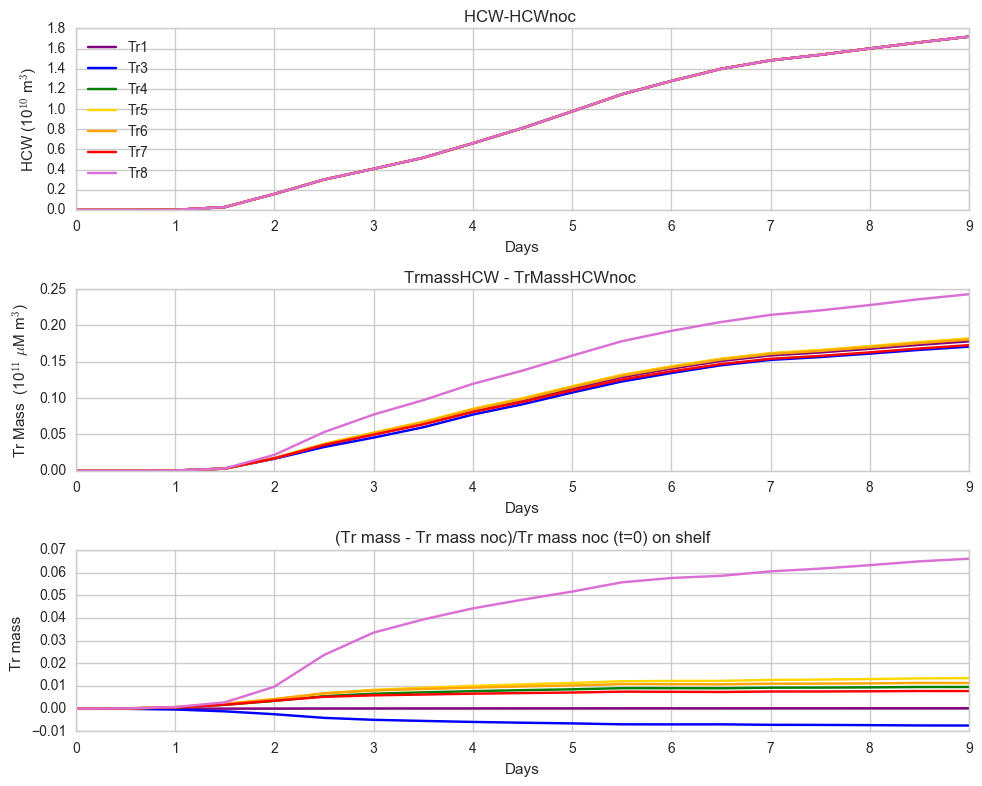

In [15]:
fig,ax = plt.subplots(3,1,figsize=(10,8))

for HCW, TrMass, TotTrMass,lab, col in zip(HCW_list,Mass_list,TotMass_list,labels,colours):
    
     ax[0].plot(np.arange(0,19,1)/2.0,(dfLWR[HCW]-dfLWRnoc[HCW])/1E10,color=col,label=lab)
     ax[1].plot(np.arange(0,19,1)/2.0,(dfLWR[TrMass]-dfLWRnoc[TrMass][0])/1E11,color=col,label=lab)
     ax[2].plot(np.arange(0,19,1)/2.0,(dfLWR[TotTrMass]-dfLWRnoc[TotTrMass])/dfLWR[TotTrMass][0],color=col,label=lab)


ax[0].set_ylabel('HCW (10$^{10}$ m$^3$)')
ax[1].set_ylabel('Tr Mass  (10$^{11}$ $\mu$M m$^3$)')
ax[2].set_ylabel('Tr mass ')

ax[0].set_xlabel('Days')
ax[0].set_title('HCW-HCWnoc ')

ax[1].set_xlabel('Days')
ax[1].set_title('TrmassHCW - TrMassHCWnoc ')

ax[2].set_xlabel('Days')
ax[2].set_title('(Tr mass - Tr mass noc)/Tr mass noc (t=0) on shelf')


ax[0].legend(loc=2)
plt.tight_layout()


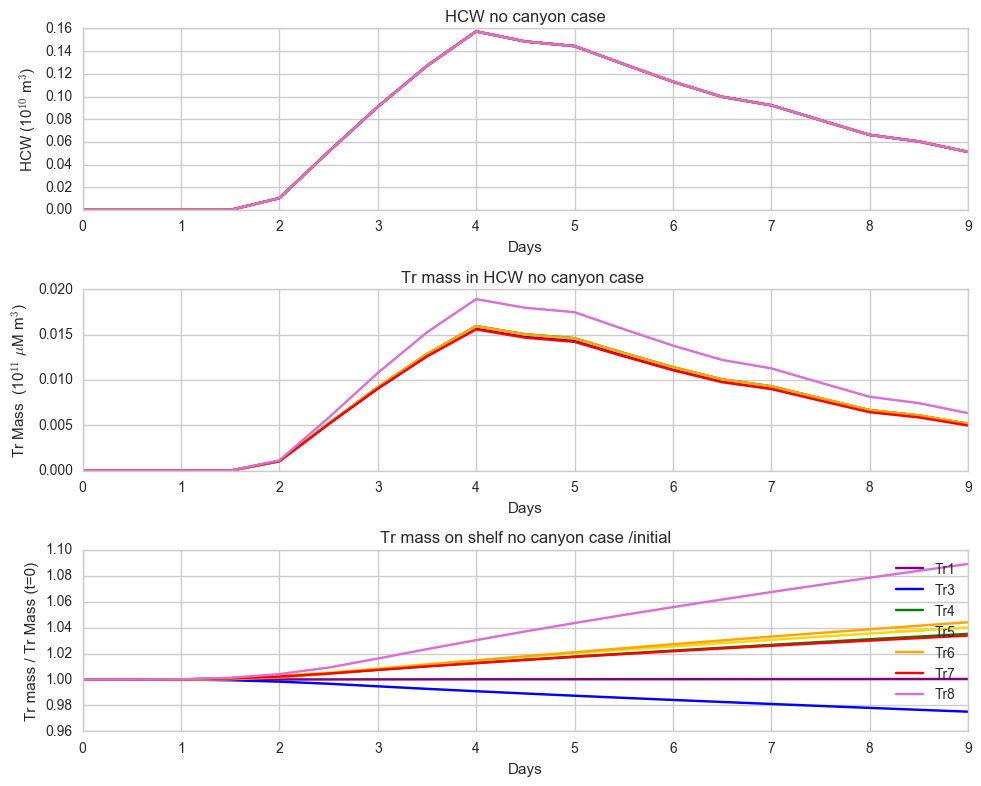

In [17]:
HCW_list = ['HCW01','HCW03','HCW04','HCW05','HCW06','HCW07','HCW08']
Mass_list = ['TrMassHCW01','TrMassHCW03','TrMassHCW04',
             'TrMassHCW05','TrMassHCW06','TrMassHCW07','TrMassHCW08']
TotMass_list = ['TotTrMass01','TotTrMass03','TotTrMass04',
             'TotTrMass05','TotTrMass06','TotTrMass07','TotTrMass08']

labels = ['Tr1','Tr3','Tr4','Tr5','Tr6','Tr7','Tr8']

colours = ['purple','blue','green','gold','orange','red','orchid']


fig,ax = plt.subplots(3,1,figsize=(10,8))

for HCW, TrMass, TotTrMass,lab, col in zip(HCW_list,Mass_list,TotMass_list,labels,colours):
    
     ax[0].plot(np.arange(0,19,1)/2.0,(dfLWRnoc[HCW])/1E10,color=col,label=lab)
     ax[1].plot(np.arange(0,19,1)/2.0,(dfLWRnoc[TrMass])/1E11,color=col,label=lab)
     ax[2].plot(np.arange(0,19,1)/2.0,(dfLWRnoc[TotTrMass])/dfLWRnoc[TotTrMass][0],color=col,label=lab)


ax[0].set_ylabel('HCW (10$^{10}$ m$^3$)')
ax[1].set_ylabel('Tr Mass  (10$^{11}$ $\mu$M m$^3$)')
ax[2].set_ylabel('Tr mass / Tr Mass (t=0)')

ax[0].set_xlabel('Days')
ax[0].set_title('HCW no canyon case')

ax[1].set_xlabel('Days')
ax[1].set_title('Tr mass in HCW no canyon case ')

ax[2].set_xlabel('Days')
ax[2].set_title('Tr mass on shelf no canyon case /initial')


ax[2].legend(loc=0)
plt.tight_layout()


In [23]:
Z = 20 # m, made up but constant for all tracers

tau_v = np.empty(7)
tracerList = [ptracers.Tr01.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr01.isel(T=0,X=180,Y=50,Z=29),
              ptracers.Tr03.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr03.isel(T=0,X=180,Y=50,Z=29),
              ptracers.Tr04.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr04.isel(T=0,X=180,Y=50,Z=29),
              ptracers.Tr05.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr05.isel(T=0,X=180,Y=50,Z=29),
              ptracers.Tr06.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr06.isel(T=0,X=180,Y=50,Z=29),
              ptracers.Tr07.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr07.isel(T=0,X=180,Y=50,Z=29),
              ptracers.Tr08.isel(T=0,X=180,Y=50,Z=slice(0,50))/ptracers.Tr08.isel(T=0,X=180,Y=50,Z=29),]

z = grid.Z[:]
for c,ii in zip(tracerList,range(7)):
    dzC = (c[30]-c[28])/(z[30]-z[28])
    dz2C = (c[30]-2*c[29]+c[28])/(z[30]*z[29])

    tau_v[ii] = Z*dz2C/dzC


tau_v_th = np.array([0,0.138,0.108,0.0543,0.0864,1.315,6.05])    
time = state.variables['T']

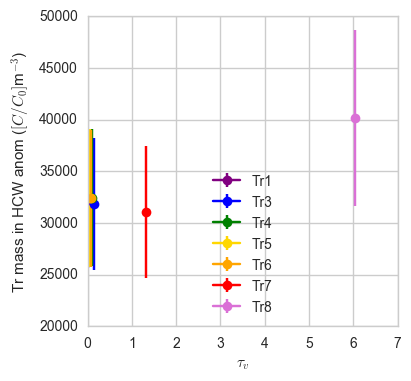

In [24]:
fig,ax = plt.subplots(1,1,figsize=(4,4))

for TrMass, tau, lab, col in zip(Mass_list,tau_v_th,labels,colours):
    
    mass_can_eff = dfLWR[TrMass]-dfLWRnoc[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    ax.errorbar(tau, PhiTr, yerr=PhiTr_std, color=col, label=lab, marker='o')
   
ax.legend(loc=0)
ax.set_xlabel(r'$\tau_v$')
ax.set_ylabel('Tr mass in HCW anom ($[C/C_0]$m$^{-3}$)')
    

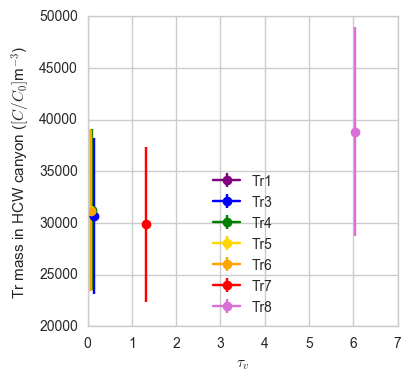

In [26]:
fig,ax = plt.subplots(1,1,figsize=(4,4))

for TrMass, tau, lab, col in zip(Mass_list,tau_v_th,labels,colours):
    
    mass_can_eff = dfLWR[TrMass]
    PhiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    PhiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    ax.errorbar(tau, PhiTr, yerr=PhiTr_std, color=col, label=lab, marker='o')
   
ax.legend(loc=0)
ax.set_xlabel(r'$\tau_v$')
ax.set_ylabel('Tr mass in HCW canyon ($[C/C_0]$m$^{-3}$)')
